In [38]:
 #Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [8]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [9]:
df = pd.read_csv("/content/gdrive/My Drive/ML_practical/dbscan/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df = df.iloc[:,[3,4]].values

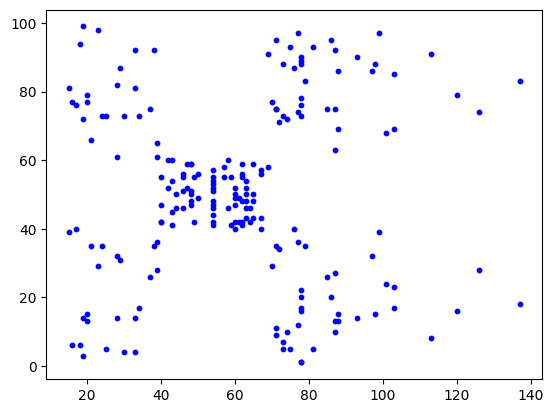

In [12]:
plt.scatter(df[:,0],df[:,1],s=10,c="blue")

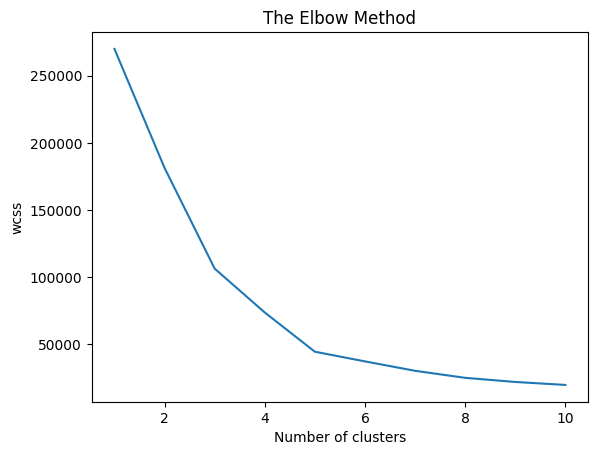

In [15]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,
  init = 'k-means++',max_iter = 300, n_init = 10)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5,min_samples=5)

In [35]:
labels = dbscan.fit_predict(df)

In [40]:
print(labels)

[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  2 -1  4  3  2  3  2 -1  2  3  4  3  2  3  2  3  4 -1  4
  3  4 -1  2 -1  4 -1  4 -1  2 -1  4  3  2  3  2 -1  4 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [36]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

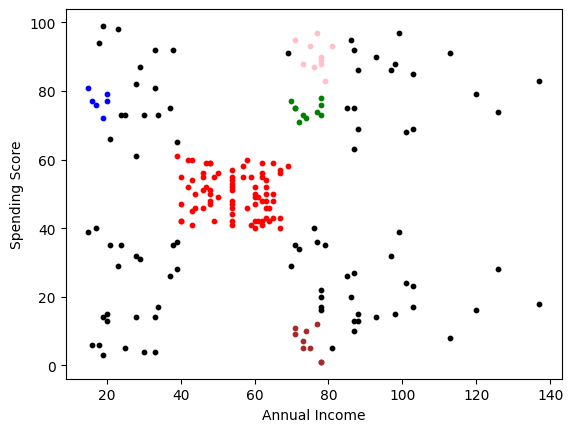

In [41]:
# Visualising the clusters
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black')

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow')
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()